# Intermediate Deep Learning

## Training robust neural networks

Features: tensor([[0.3592, 0.6596, 0.2034, 0.4746, 0.5283, 0.3724, 0.4665, 0.2392, 0.4439],
        [0.7397, 0.3852, 0.6092, 0.4230, 0.6116, 0.5254, 0.6916, 0.3165, 0.5469]],
       device='cuda:0'),
Labels: tensor([0., 1.], device='cuda:0')


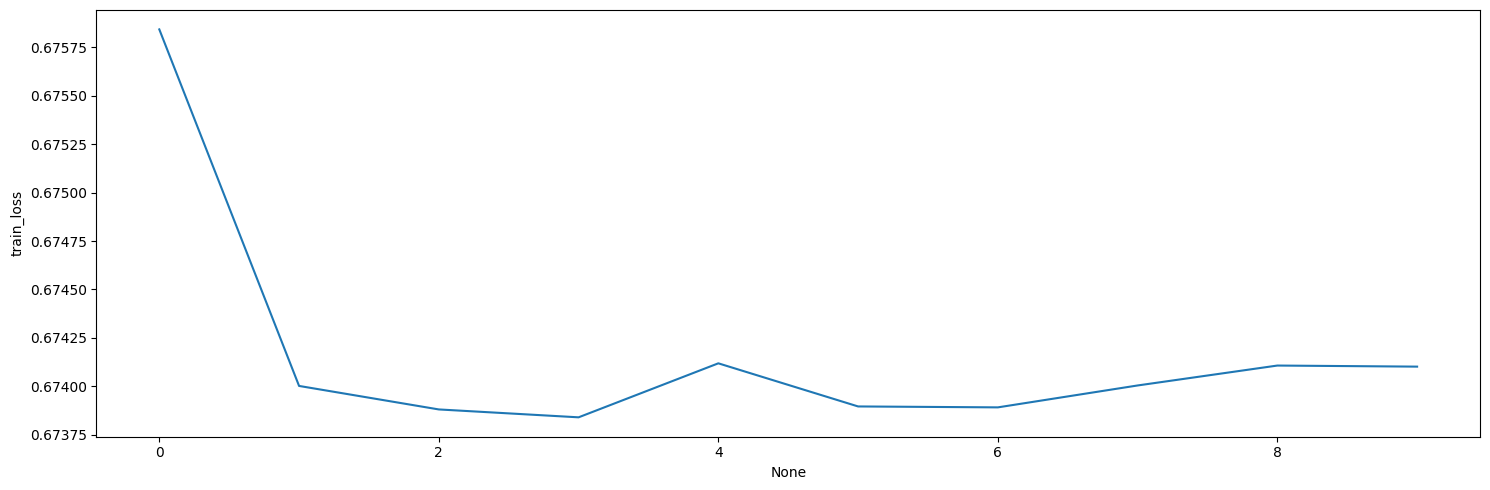

In [4]:
import os
import numpy as np
np.random.seed(seed=42)
import pandas as pd
import torch
torch.manual_seed(seed=42)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

class WaterDataset(torch.utils.data.Dataset):
    def __init__(self, csv_path):
        super().__init__()
        # Load data to pandas DataFrame
        df = pd.read_csv(csv_path)
        # Convert data to a NumPy array and assign to self.data
        self.data = df.to_numpy(dtype=np.float32)
        
    # Implement __len__ to return the number of data samples
    def __len__(self):
        return self.data.shape[0]
    
    def __getitem__(self, idx):
        features = self.data[idx, :-1]
        # Assign last data column to label
        label = self.data[idx, -1]
        return features, label

# Create an instance of the WaterDataset
os.makedirs('data', exist_ok=True)
dataset_train = WaterDataset("./data/water_train.csv")

# Create a DataLoader based on dataset_train
dataloader_train = torch.utils.data.DataLoader(
    dataset=dataset_train, batch_size=2, shuffle=True,
)
# Get a batch of features and labels
features, labels = next(iter(dataloader_train))
if torch.cuda.is_available():
    features = features.cuda()
    labels = labels.cuda()
print(f"Features: {features},\nLabels: {labels}")

class Net(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # Define the three linear layers
        self.fc1 = torch.nn.Linear(in_features=9, out_features=16)
        self.fc2 = torch.nn.Linear(in_features=16, out_features=8)
        self.fc3 = torch.nn.Linear(in_features=8, out_features=1)
        
    def forward(self, x):
        # Pass x through linear layers adding activations
        x = torch.nn.functional.relu(self.fc1(x))
        x = torch.nn.functional.relu(self.fc2(x))
        x = torch.nn.functional.sigmoid(self.fc3(x))
        return x

net = Net()
if torch.cuda.is_available():
    net = net.cuda()
criterion = torch.nn.BCELoss()
# Define the SGD optimizer
optimizer = torch.optim.SGD(params=net.parameters(), lr=1e-2)

history = {
    "train_loss":[]
}
for epoch in range(10):
    train_loss = 0.0
    for features, labels in dataloader_train:
        if torch.cuda.is_available():
            features = features.cuda()
            labels = labels.cuda()
        optimizer.zero_grad()
        outputs = net(features)
        loss = criterion(input=outputs, target=labels.view(-1, 1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss = train_loss / len(dataloader_train)
    history["train_loss"].append(train_loss)

df_history = pd.DataFrame(history)
plt.figure(figsize=(15, 5))
sns.lineplot(data=df_history, x=df_history.index, y="train_loss")
plt.tight_layout()
plt.show()

In [ ]:
import torch.optim as optim

net = Net()

# Define the SGD optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001)

train_model(
    optimizer=optimizer,
    net=net,
    num_epochs=10,
)

import torch.optim as optim

net = Net()

# Define the RMSprop optimizer
optimizer = optim.RMSprop(net.parameters(), lr=0.001)

train_model(
    optimizer=optimizer,
    net=net,
    num_epochs=10,
)

import torch.optim as optim

net = Net()

# Define the Adam optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

train_model(
    optimizer=optimizer,
    net=net,
    num_epochs=10,
)

In [ ]:
import torch
from torchmetrics import Accuracy

# Set up binary accuracy metric
acc = Accuracy(task="binary")

net.eval()
with torch.no_grad():
    for features, labels in dataloader_test:
        # Get predicted probabilities for test data batch
        outputs = net(features)
        preds = (outputs >= 0.5).float()
        acc(preds, labels.view(-1, 1))

# Compute total test accuracy
test_accuracy = acc.compute()
print(f"Test accuracy: {test_accuracy}")

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(9, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        
        # Apply He initialization
        init.kaiming_uniform_(self.fc1.weight)
        init.kaiming_uniform_(self.fc2.weight)
        init.kaiming_uniform_(self.fc3.weight, nonlinearity="sigmoid")

    def forward(self, x):
        # Update ReLU activation to ELU
        x = nn.functional.elu(self.fc1(x))
        x = nn.functional.elu(self.fc2(x))
        x = nn.functional.sigmoid(self.fc3(x))
        return x

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(9, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 1)
        # Add two batch normalization layers
        self.bn1 = nn.BatchNorm1d(16)
        self.bn2 = nn.BatchNorm1d(8)
        
        init.kaiming_uniform_(self.fc1.weight)
        init.kaiming_uniform_(self.fc2.weight)
        init.kaiming_uniform_(self.fc3.weight, nonlinearity="sigmoid") 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = nn.functional.elu(x)

        # Pass x through the second set of layers
        x = self.fc2(x)
        x = self.bn2(x)
        x = nn.functional.elu(x)

        x = nn.functional.sigmoid(self.fc3(x))
        return x

In [ ]:
# Compose transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((128, 128)),
])

# Create Dataset using ImageFolder
dataset_train = ImageFolder(
    "clouds_train",
    transform=train_transforms,
)

In [ ]:
train_transforms = transforms.Compose([
    # Add horizontal flip and rotation
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.ToTensor(),
    transforms.Resize((128, 128)),
])

dataset_train = ImageFolder(
  "clouds_train",
  transform=train_transforms,
)

dataloader_train = DataLoader(
  dataset_train, shuffle=True, batch_size=1
)

image, label = next(iter(dataloader_train))
# Reshape the image tensor
image = image.squeeze().permute(1, 2, 0)
# Display the image
plt.imshow(image)
plt.show()

In [ ]:
class Net(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        # Define feature extractor
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ELU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Flatten(),
        )
        # Define classifier
        self.classifier = nn.Linear(64*16*16, num_classes)
    
    def forward(self, x):  
        # Pass input through feature extractor and classifier
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x

In [ ]:
# Define transforms
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(45),
    transforms.RandomAutocontrast(),
    transforms.ToTensor(),
    transforms.Resize((64, 64)),
])

dataset_train = ImageFolder(
  "clouds_train",
  transform=train_transforms,
)
dataloader_train = DataLoader(
  dataset_train, shuffle=True, batch_size=16
)

In [ ]:
# Define the model
net = Net(num_classes=7)
# Define the loss function
criterion = nn.CrossEntropyLoss()
# Define the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

for epoch in range(3):
    running_loss = 0.0
    # Iterate over training batches
    for images, labels in dataloader_train:
        optimizer.zero_grad()
        outputs = net(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(dataloader_train)
    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}")

In [ ]:
# Define metrics
metric_precision = Precision(task="multiclass", num_classes=7, average="micro")
metric_recall = Recall(task="multiclass", num_classes=7, average="micro")

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
        metric_recall(preds, labels)

precision = metric_precision.compute()
recall = metric_recall.compute()
print(f"Precision: {precision}")
print(f"Recall: {recall}")

In [ ]:
# Define metrics
metric_precision = Precision(task="multiclass", num_classes=7, average=None)
metric_recall = Recall(task="multiclass", num_classes=7, average=None)

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
        metric_recall(preds, labels)

precision = metric_precision.compute().mean()
recall = metric_recall.compute().mean()
print(f"Precision: {precision}")
print(f"Recall: {recall}")

In [ ]:
# Define precision metric
metric_precision = Precision(
    task="multiclass", num_classes=7, average=None
)

net.eval()
with torch.no_grad():
    for images, labels in dataloader_test:
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        metric_precision(preds, labels)
precision = metric_precision.compute()

# Get precision per class
precision_per_class = {
    k: precision[v].item()
    for k, v 
    in dataset_test.class_to_idx.items()
}
print(precision_per_class)

In [ ]:
import numpy as np

def create_sequences(df, seq_length):
    xs, ys = [], []
    # Iterate over data indices
    for i in range(len(df) - seq_length):
      	# Define inputs
        x = df.iloc[i:(i+seq_length), 1]
        # Define target
        y = df.iloc[i+seq_length, 1]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [ ]:
import torch
from torch.utils.data import TensorDataset

# Use create_sequences to create inputs and targets
X_train, y_train = create_sequences(train_data, 24*4)
print(X_train.shape, y_train.shape)

# Create TensorDataset
dataset_train = TensorDataset(
    torch.from_numpy(X_train).float(),
    torch.from_numpy(y_train).float(),
)
print(len(dataset_train))

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Define RNN layer
        self.rnn = nn.RNN(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_first=True,
        )
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        # Initialize first hidden state with zeros
        h0 = torch.zeros(2, x.size(0), 32)
        # Pass x and h0 through recurrent layer
        out, _ = self.rnn(x, h0)  
        # Pass recurrent layer's last output through linear layer
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
class Net(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        # Define lstm layer
        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_first=True,
        )
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32)
        # Initialize long-term memory
        c0 = torch.zeros(2, x.size(0), 32)
        # Pass all inputs to lstm layer
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # Define RNN layer
        self.gru = nn.GRU(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_first=True,
        )
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32)
        out, _ = self.gru(x, h0)  
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
net = Net()
# Set up MSE loss
criterion = nn.MSELoss()
optimizer = optim.Adam(
  net.parameters(), lr=0.0001
)

for epoch in range(3):
    for seqs, labels in dataloader_train:
        # Reshape model inputs
        seqs = seqs.view(16, 96, 1)
        # Get model outputs
        outputs = net(seqs)
        # Compute loss
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

In [ ]:
# Define MSE metric
mse = torchmetrics.MeanSquaredError()

net.eval()
with torch.no_grad():
    for seqs, labels in dataloader_test:
        seqs = seqs.view(32, 96, 1)
        # Pass seqs to net and squeeze the result
        outputs = net(seqs).squeeze()
        mse(outputs, labels)

# Compute final metric value
test_mse = mse.compute()
print(f"Test MSE: {test_mse}")

In [ ]:
class OmniglotDataset(Dataset):
    def __init__(self, transform, samples):
		# Assign transform and samples to class attributes
        self.transform = transform
        self.samples = samples
                    
    def __len__(self):
		# Return number of samples
        return len(self.samples)

    def __getitem__(self, idx):
      	# Unpack the sample at index idx
        img_path, alphabet, label = self.samples[idx]
        img = Image.open(img_path).convert('L')
        # Transform the image 
        img_transformed = self.transform(img)
        return img_transformed, alphabet, label

dataset_train = OmniglotDataset(
    transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((64, 64)),
    ]),
    samples=samples,
)

dataloader_train = DataLoader(
    dataset_train, shuffle=True, batch_size=3,
)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define sub-networks as sequential models
        self.image_layer = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size=2),
            nn.ELU(),
            nn.Flatten(),
            nn.Linear(16*32*32, 128)
        )
        self.alphabet_layer = nn.Sequential(
            nn.Linear(30, 8),
            nn.ELU(), 
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 + 8, 964), 
        )
        
    def forward(self, x_image, x_alphabet):
		# Pass the x_image and x_alphabet through appropriate layers
        x_image = self.image_layer(x_image)
        x_alphabet = self.alphabet_layer(x_alphabet)
        # Concatenate x_image and x_alphabet
        x = torch.cat((x_image, x_alphabet), dim=1)
        return self.classifier(x)

In [ ]:
# Print the sample at index 100
print(samples[100])

# Create dataset_train
dataset_train = OmniglotDataset(
    transform=transforms.Compose([
        transforms.ToTensor(),
      	transforms.Resize((64, 64)),
    ]),
    samples=samples,
)

# Create dataloader_train
dataloader_train = DataLoader(
    dataset_train, shuffle=True, batch_size=32
)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.image_layer = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, padding=1),
            nn.MaxPool2d(kernel_size=2),
            nn.ELU(),
            nn.Flatten(),
            nn.Linear(16*32*32, 128)
        )
        # Define the two classifier layers
        self.classifier_alpha = nn.Linear(128, 30)
        self.classifier_char = nn.Linear(128, 964)

In [ ]:
net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.05)

for epoch in range(1):
    for images, labels_alpha, labels_char in dataloader_train:
        optimizer.zero_grad()
        outputs_alpha, outputs_char = net(images)
        # Compute alphabet classification loss
        loss_alpha = criterion(outputs_alpha, labels_alpha)
        # Compute character classification loss
        loss_char = criterion(outputs_char, labels_char)
        # Compute total loss
        loss = loss_alpha + loss_char
        loss.backward()
        optimizer.step()

In [ ]:
def evaluate_model(model):
    # Define accuracy metrics
    acc_alpha = Accuracy(task="multiclass", num_classes=30)
    acc_char = Accuracy(task="multiclass", num_classes=964)

    model.eval()
    with torch.no_grad():
        for images, labels_alpha, labels_char in dataloader_test:
            # Obtain model outputs
            outputs_alpha, outputs_char = model(images)
            _, pred_alpha = torch.max(outputs_alpha, 1)
            _, pred_char = torch.max(outputs_char, 1)
			# Update both accuracy metrics
            acc_alpha(pred_alpha, labels_alpha)
            acc_char(pred_char, labels_char)
    
    print(f"Alphabet: {acc_alpha.compute()}")
    print(f"Character: {acc_char.compute()}")